# Zipline Drone Data Analysis
- Kenneth Huang

In [76]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import matplotlib
import numpy as np
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
from pandas.plotting import scatter_matrix
%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)




summary = pd.read_csv(os.path.expanduser("~/Desktop/data_scientist_take-home/summary_data.csv"))

summary["pos_magnitude"] = np.nan
summary["vel_magnitude"] = np.nan


summary = summary.drop(['battery_serial_number', 'body_serial_number', 'commit', 'launch_timestamp', 'wind_direction',
              'wing_serial_number'], axis=1)



In [77]:
flights = summary['flight_id']



def plot_speeds(df):    
    
    for flight_number in flights:
        file_path = "~/Desktop/data_scientist_take-home/flight_" + str(flight_number) + ".csv"
        flight_data = pd.read_csv(os.path.expanduser(file_path))

        north_pos = flight_data["position_ned_m[0]"].astype(float)
        east_pos = flight_data["position_ned_m[1]"].astype(float)
        down_pos = flight_data["position_ned_m[2]"].astype(float)
        pos_sq = (north_pos**2)+(east_pos**2)+(down_pos**2)
        pos_magnitude = (pos_sq**(1/2)).mean()
        
        df.loc[summary["flight_id"] == flight_number, "pos_magnitude"] = pos_magnitude
        
        
        north_vel = flight_data["velocity_ned_mps[0]"].astype(float)
        east_vel = flight_data["velocity_ned_mps[1]"].astype(float)
        down_vel = flight_data["velocity_ned_mps[2]"].astype(float)
        vel_sq = (north_vel**2)+(east_vel**2)+(down_vel**2)
        vel_magnitude = (vel_sq**(1/2)).mean()
        
        df.loc[summary["flight_id"] == flight_number, "vel_magnitude"] = vel_magnitude
    
    return df

# First 10 rows of the compiled, summary data from each flight (446 entries)

In [78]:
result = plot_speeds(summary)
result.head(10)

,flight_id,air_temperature,launch_airspeed,launch_groundspeed,preflight_voltage,rel_humidity,static_pressure,wind_magnitude,pos_magnitude,vel_magnitude
0,16951,20.550000,32.453445,30.164656,NaN,74.150000,80662.081736,1.949338,172.672823,21.859760
1,16952,20.500000,32.141209,30.535246,NaN,71.175044,80708.065314,0.917357,175.758916,22.258192
2,16954,24.475019,34.701878,29.872613,NaN,66.374982,80774.270438,3.788383,170.555512,21.342961
3,16955,27.300000,34.368999,29.877624,NaN,59.000000,80805.138793,3.921605,165.728812,20.922227
4,16957,26.950000,32.898979,30.027183,NaN,63.900000,80768.969307,2.975881,167.832353,21.360815
5,16959,28.574951,33.258007,30.178811,NaN,65.074951,80621.201026,2.750346,173.162174,22.153258
6,16960,27.550000,33.937340,30.063187,NaN,61.250000,80599.898970,1.556340,169.448839,21.815212
7,16961,28.250000,33.598980,29.969515,NaN,53.500000,80552.491259,2.378607,168.641768,21.204245
8,16962,28.600000,31.639851,30.263741,NaN,60.374982,80445.017877,1.161924,177.373540,22.653813
9,16965,32.250000,32.744957,30.354775,NaN,49.600000,80379.646583,2.742027,172.323565,22.063021


Text(0, 0.5, 'Air Temp (Celsius)')

Text(0.5, 0, 'Average distance (in meters)')

Text(0.5, 1.0, 'Scattering air_temp vs distance')

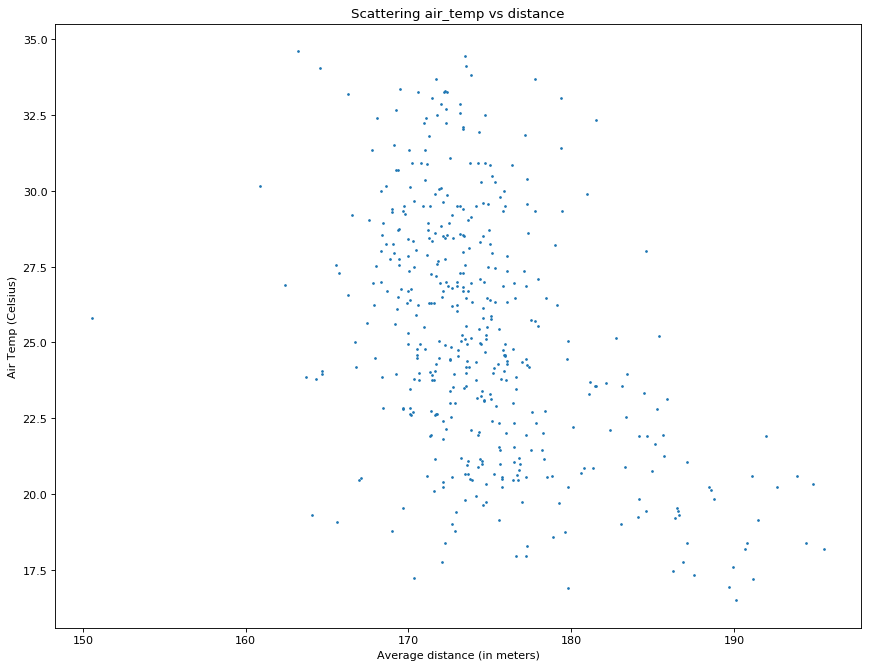

In [79]:
fig = plt.figure(figsize=(13, 10), dpi = 80, facecolor = 'w', edgecolor = 'k')

plt.scatter(result["pos_magnitude"], result["air_temperature"], s=2)
plt.ylabel("Air Temp (Celsius)")
plt.xlabel("Average distance (in meters)")
plt.title("Scattering air_temp vs distance")


- While the scatterplot seems to show only a slightly negative correlation, it is observed that most flights travel an average distance of 170-180 meters; flights that travel in colder temperatures seem to be capable of traveling farther (180m +)

# Taking a look at distributions and quartiles

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1134141d0>,
      dtype=object)

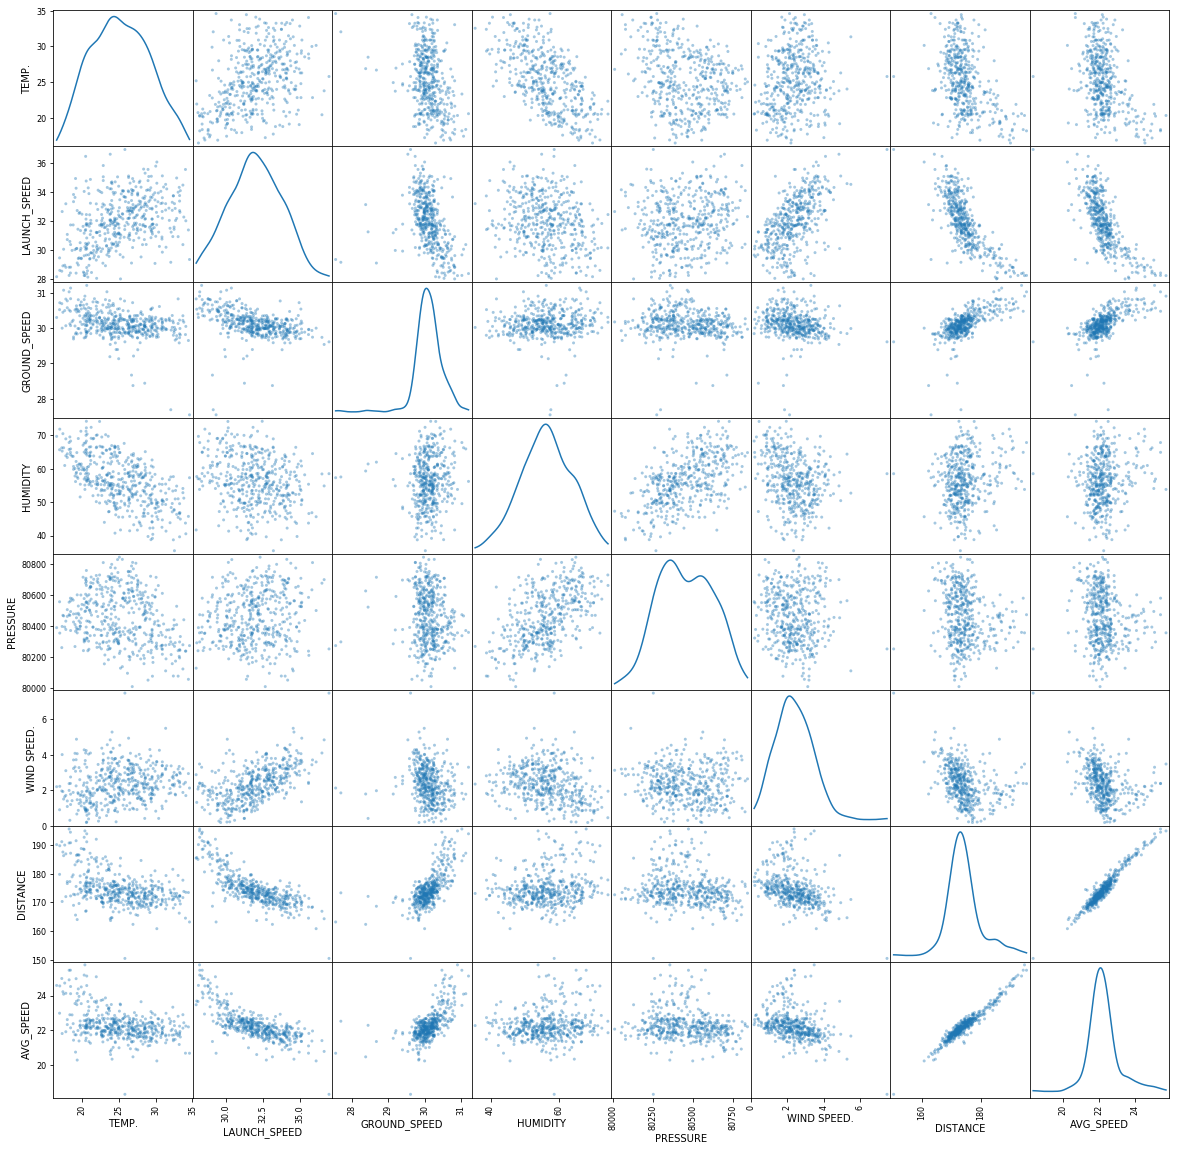

In [80]:
relevant_data = result.drop(['flight_id','preflight_voltage'], axis=1)
relevant_data.rename(columns={'air_temperature':'TEMP.',
                          'rel_humidity':'HUMIDITY',
                          'static_pressure':'PRESSURE',
                          'wind_magnitude':'WIND SPEED.',
                          'pos_magnitude':'DISTANCE',
                          'vel_magnitude':'AVG_SPEED', 
                          'launch_groundspeed':'GROUND_SPEED', 
                          'launch_airspeed':'LAUNCH_SPEED'}, inplace=True)

scatter_matrix(relevant_data, alpha=0.4, figsize=(20, 20), diagonal='kde')


# Martix comparing variable against variable to fully visualize the correlations between important distributions 

- Slight, negative correlations between: (wind speed & travel dist.), and again (air_temperature and dist.)
- Interestingly, the launch speed does not seem to affect the distance or speed that is experienced during travel
- And most notably, initial ground speed strongly correlates with distance and speed during the flight

{'whiskers': [<matplotlib.lines.Line2D at 0x130434128>,
 'caps': [<matplotlib.lines.Line2D at 0x1304346a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12fba98d0>],
 'medians': [<matplotlib.lines.Line2D at 0x130434d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1304370b8>],
 'means': []}

Text(0, 0.5, 'Distance (meters)')

Text(0.5, 0, 'Standard Deviation: 5.72')

Text(0.5, 1.0, 'Note: Outliers are the most dense past the 4th quartile')

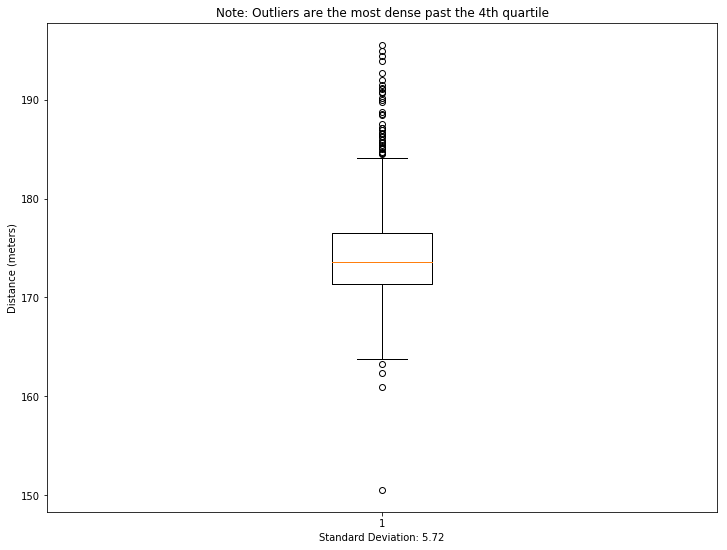

In [81]:
fig = plt.figure(figsize=(12, 9))
deviation = result['pos_magnitude'].values.std(ddof=1)
xlab = "Standard Deviation: " + str(deviation)[0:4]

plt.boxplot(result['pos_magnitude'])
plt.ylabel("Distance (meters)")
plt.xlabel(xlab)
plt.title("Note: Outliers are the most dense past the 4th quartile")


- There is little variation in distance/velocity across the drones 
- Flights are relativly consistent
- Extended flight range outliers = (184-196 METERS)
- Less than 10% of flights are able to make it this far

In [86]:
outliers = result[result['pos_magnitude'] > 184]
max_temp = outliers['air_temperature'].max()
min_temp = outliers['air_temperature'].min()
optimal_temp = outliers['air_temperature'].mean()

inrange = result[result['pos_magnitude'] <= 184]
range_max = inrange['air_temperature'].max()
range_min = inrange['air_temperature'].min()
range_average = inrange['air_temperature'].mean()

- Optimal flight conditions occur when the air temperature falls between 16.5 to 28 Celcius 
- Drones that fell short of 184 meters, flew in temperatures ranging from 17 to 34.6 Celcius.


- These findings conclude that it is imperative for engineers to consider implementing some type of heat-control/cooling mechanism in these drones, in order to maximize travel efficiency.    

